<a href="https://colab.research.google.com/github/ZlataGlazunova/homeworks/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D0%BE%D0%B2_%D0%BF%D1%80%D0%BE%D0%B1%D0%BD%D1%8B%D1%85_%D1%80%D0%B0%D0%B1%D0%BE%D1%82_%D0%9E%D0%93%D0%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Начать работу
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#@title Загрузите файл
while True:
  name = input('Введите название файла: ')
  try:
    df = pd.read_excel(name)
    break
  except FileNotFoundError:
    print('Такого файла нет. Попробуйте ещё.')

df = df['Фамилия'].map(lambda s: s.replace(' ', ''))

Введите название файла: 1.xlsx


In [ ]:
#@title Анализ таблицы
df['схема'] = ''
def Counter_algebra (n):
  algebra = 0
  for i in df.loc[n, 1:14]:
    if i != 'х':
      algebra += i
  for i in df.loc[n, 20:22]:
    if i != 'х':
      algebra += i
  return algebra

def Counter_geometry (n):
  geometry = 0
  for i in df.loc[n, 15:19]:
    if i != 'х':
      geometry += i
  for i in df.loc[n, 23:25]:
    if i != 'х':
      geometry += i
  return geometry
def Def_marks(a, g):
  if a <= 6 and g <= 2:
    return 2
  elif a+g <= 14:
    return 3
  elif a+g <= 21:
    return 4
  else:
    return 5

def Def_mark(a, g):
  if a < 6 or g < 2:
    return 2
  elif a+g <= 14:
    return 3
  elif a+g <= 21:
    return 4
  else:
    return 5

for n in df.index:
  algebra = Counter_algebra(n)
  geometry = Counter_geometry(n)

  scheme = str(int(algebra))+'-'+str(int(geometry))
  df.loc[n, 'схема'] = scheme

  points = algebra + geometry
  df.loc[n, 'баллы'] = points

  mark = Def_mark(algebra, geometry)
  df.loc[n, 'оценка'] = mark

percent = ['% выполнения']
students = len(df)
df.loc[students, 'Фамилия'] = 'выполнено'
df.loc[students+1, 'Фамилия'] = '% выполнения'
for i in range(1, 26):
  df_sum = df[(df[i] != 'х')]
  df_sum = df_sum[df_sum[i] != 0]
  summ = df_sum[i].sum()
  df.loc[students, i] =summ
  if i < 20:
    perc = round(summ/students*100, 0)
    df.loc[students+1, i] = perc
  else:
    perc = round(summ/(students*2)*100, 0)
    df.loc[students+1, i] = perc

name_file = input('Введите название для файла:')
df.to_excel(name_file+'.xlsx', index=False)
display(df)

Введите название для файла:2


,Фамилия,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,схема,баллы,оценка
0,Аббасов,1,1,0,х,х,1,1.0,1,0,...,1.0,х,х,х,х,х,х,6-1,7.0,2.0
1,Анохин,1,0,0,1,1,1,1.0,1,х,...,1.0,х,х,х,х,х,х,7-4,11.0,3.0
2,Белоногов,1,0,1,0,1,0,1.0,1,0,...,0.0,х,х,х,х,х,х,6-2,8.0,3.0
3,Валиев,1,х,1,х,1,х,1.0,0,х,...,0.0,х,х,х,х,х,х,4-2,6.0,2.0
4,Валова,1,0,0,0,0,0,1.0,0,0,...,0.0,х,х,х,х,х,х,4-2,6.0,2.0
5,Ворошилов,1,0,0,0,0,1,0.0,1,0,...,0.0,х,х,х,х,х,х,5-3,8.0,2.0
6,Журавлева,1,0,0,0,1,1,1.0,0,1,...,0.0,х,х,х,х,х,х,7-2,9.0,3.0
7,Зудин,1,1,1,х,1,1,1.0,1,1,...,0.0,х,х,х,х,х,х,11-2,13.0,3.0
8,Лавринищев,1,0,0,1,0,1,1.0,0,0,...,0.0,х,х,х,х,х,х,7-3,10.0,3.0
9,Максимов,1,1,0,0,1,0,1.0,1,0,...,0.0,х,х,х,х,х,х,8-3,11.0,3.0


In [ ]:
#@title Успеваемость
df_Marks = df['оценка'].value_counts().reset_index()

for i in range(len(df_Marks)):
  mark = int(df_Marks.loc[i,'оценка'])
  count_mark = int(df_Marks.loc[i,'count'])
  perc_mark = int(count_mark/students*100)
  print(f"«{mark}»-{count_mark} чел.({perc_mark}%)")

quality = int((df_Marks[(df_Marks['оценка']==5)|(df_Marks['оценка']==4)]['count'].sum())/students*100)
success = int((df_Marks[(df_Marks['оценка']!=2)]['count'].sum())/students*100)
medi = int(df['баллы'].median())
avg = round(df['баллы'].mean(), 1)
avg_perc = round(avg/31*100, 1)
print(f"""%успеваемости-{success}%
%качества-{quality}%
Медиана-{medi}, средний балл-{avg}({avg_perc}%)""")

«2»-12 чел.(52%)
«3»-9 чел.(39%)
«4»-1 чел.(4%)
«5»-1 чел.(4%)
%успеваемости-47%
%качества-8%
Медиана-8, средний балл-9.4(30.3%)


In [ ]:
#@title Результаты ОГЭ по математике в порядке убывания
df_decresing = df.sort_values(by=['оценка', 'баллы'], ascending=False)
name_file = input('Введите название для файла:')
df_decresing.to_excel(name_file+'.xlsx',index=False)
display(df_decresing)

Введите название для файла:3


,Фамилия,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,схема,баллы,оценка
21,Федоров,1,1,1,0,1,1,1.0,1,1,...,0.0,2,2,1,1,2,х,18-7,25.0,5.0
18,Титаренко,1,1,1,1,1,1,1.0,0,1,...,0.0,х,х,х,х,х,х,12-4,16.0,4.0
7,Зудин,1,1,1,х,1,1,1.0,1,1,...,0.0,х,х,х,х,х,х,11-2,13.0,3.0
12,Рянин,1,0,0,0,0,1,1.0,1,1,...,1.0,х,х,х,х,х,х,7-5,12.0,3.0
14,Сапунова,1,1,0,х,0,1,1.0,1,0,...,1.0,х,х,х,х,х,х,9-3,12.0,3.0
16,Стерлядьев,1,1,1,0,1,0,1.0,1,0,...,0.0,х,х,х,х,х,х,9-3,12.0,3.0
1,Анохин,1,0,0,1,1,1,1.0,1,х,...,1.0,х,х,х,х,х,х,7-4,11.0,3.0
9,Максимов,1,1,0,0,1,0,1.0,1,0,...,0.0,х,х,х,х,х,х,8-3,11.0,3.0
8,Лавринищев,1,0,0,1,0,1,1.0,0,0,...,0.0,х,х,х,х,х,х,7-3,10.0,3.0
6,Журавлева,1,0,0,0,1,1,1.0,0,1,...,0.0,х,х,х,х,х,х,7-2,9.0,3.0


In [ ]:
#@title Выявление заданий, которые вызвали сложности у определенного ученика
diction = {1:'Выбор объекта', 2: 'Простейшие текстовые задачи', 3: 'Прикладная геометрия', 4: 'Прикладная геометрия',5: 'Выбор оптимального варианта', 6: 'Числа и вычисления', 7: 'Числовые неравенства, координатная прямая', 8: 'Вычисления и алгебраические выражения', 9: 'Уравнения, системы уравнений', 10:'Вероятность', 11:'Графики функций', 12:'Расчеты по формулам', 13:'Неравенства, системы неравенств', 14:'Задачи на прогрессии', 15:'Треугольники, четырехугольники и их элементы', 16:'Окружность, круг и их  элементы', 17:'Площади фигур', 18:'Фигуры на квадратной решетке', 19:'Анализ геометрических высказываний' }
while True:
  name = input('Введите фамилию ученика:')
  df_name = df.loc[df['Фамилия']==name]
  try:
    df_name.iloc[0,0]
    break
  except IndexError:
    print('Такого ученика нет. Попробуйте ещё раз.')
print('Этому ученику следует поработать над заданиями: ')

for i in range(1, 20):
  n=str(df_name.iloc[0,i])
  if n == '0' or n == 'х':
    print('№'+str(i),'-', diction[i])

Введите фамилию ученика:Аббасов
Этому ученику следует поработать над заданиями: 
№3 - Прикладная геометрия
№4 - Прикладная геометрия
№5 - Выбор оптимального варианта
№9 - Уравнения, системы уравнений
№10 - Вероятность
№13 - Неравенства, системы неравенств
№15 - Треугольники, четырехугольники и их элементы
№16 - Окружность, круг и их  элементы
№17 - Площади фигур


Введите название для файла:9


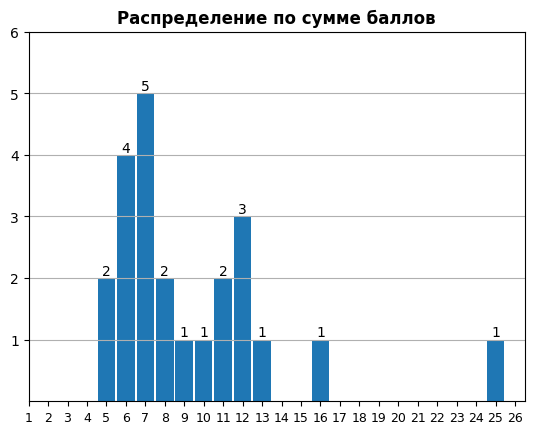

In [ ]:
#@title График распределения по сумме баллов
df_Points = df['баллы'].value_counts().reset_index()
x = df_Points['баллы']
y = df_Points['count']
bars = plt.bar(x, y, width=0.9)
plt.grid(axis='y', alpha =1)
plt.xticks(range(1, int(df_Points['баллы'].max())+2), fontsize=9)
plt.yticks(range(1,int(df_Points['count'].max())+2))
plt.bar_label(bars)
plt.title('Распределение по сумме баллов', fontweight='semibold')
name_file = input('Введите название для файла:')
plt.savefig(name_file+'.jpg')
plt.show()

Введите название для файла:r


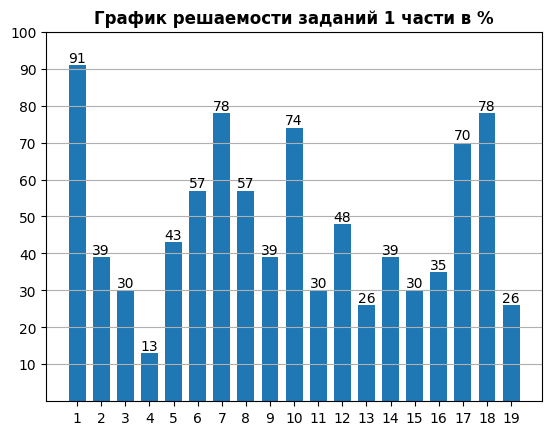

In [ ]:
#@title График решаемости заданий 1 части
df_solve = df[df['Фамилия']=='% выполнения'].values.tolist()[0]
y = df_solve[1:20]
x = list(range(1,20))
bars = plt.bar(x, y, width=0.7)
plt.grid(axis='y', alpha =1)
plt.bar_label(bars)
plt.xticks(range(1,20))
plt.yticks(range(10,101,10))
plt.title('График решаемости заданий 1 части в %', fontweight='semibold')
name_file = input('Введите название для файла:')
plt.savefig(name_file+'.jpg')
plt.show()

Введите название для файла:y


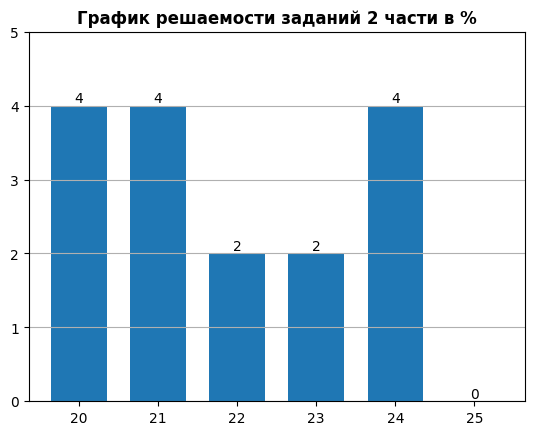

In [ ]:
#@title График решаемости заданий 2 части
y = df_solve[20:26]
x = list(range(20,26))
bars = plt.bar(x, y, width=0.7)
plt.grid(axis='y', alpha =1)
plt.bar_label(bars)
plt.xticks(range(20,26))
plt.yticks(range(max(list(map(int, y)))+2))
plt.title('График решаемости заданий 2 части в %', fontweight='semibold')
name_file = input('Введите название для файла:')
plt.savefig(name_file+'.jpg')
plt.show()

Введите название для файла:гг


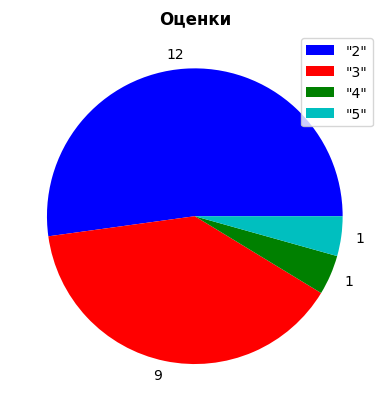

In [ ]:
#@title Круговая диаграмма - оценки
df_Marks
x = df_Marks['count']
labels = ['"2"', '"3"', '"4"', '"5"']
plt.pie(x = x, labels=x, colors=['b', 'r', 'g', 'c'], pctdistance=0,)
plt.legend(labels)
plt.title('Оценки', fontweight='semibold')
name_file = input('Введите название для файла:')
plt.savefig(name_file+'.jpg')
plt.show()